206


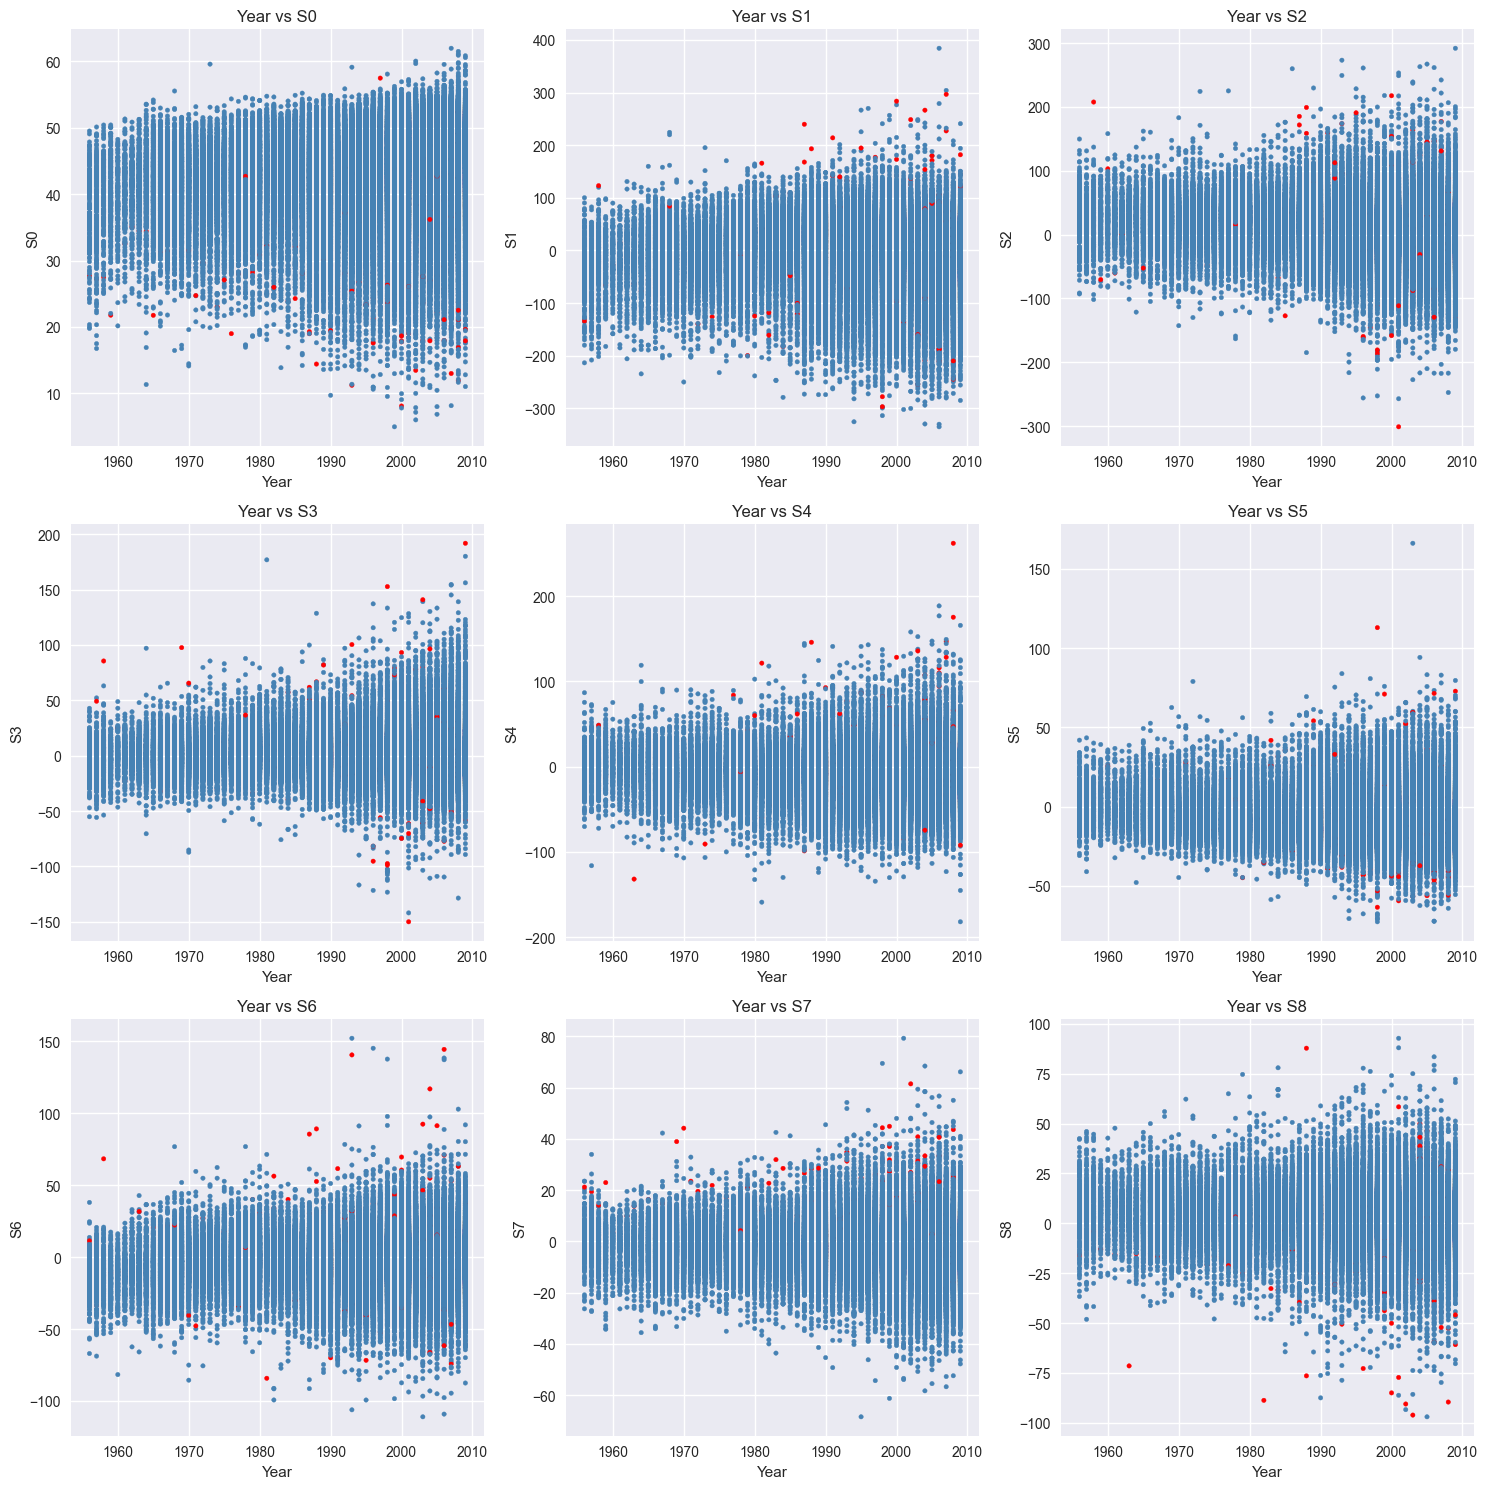

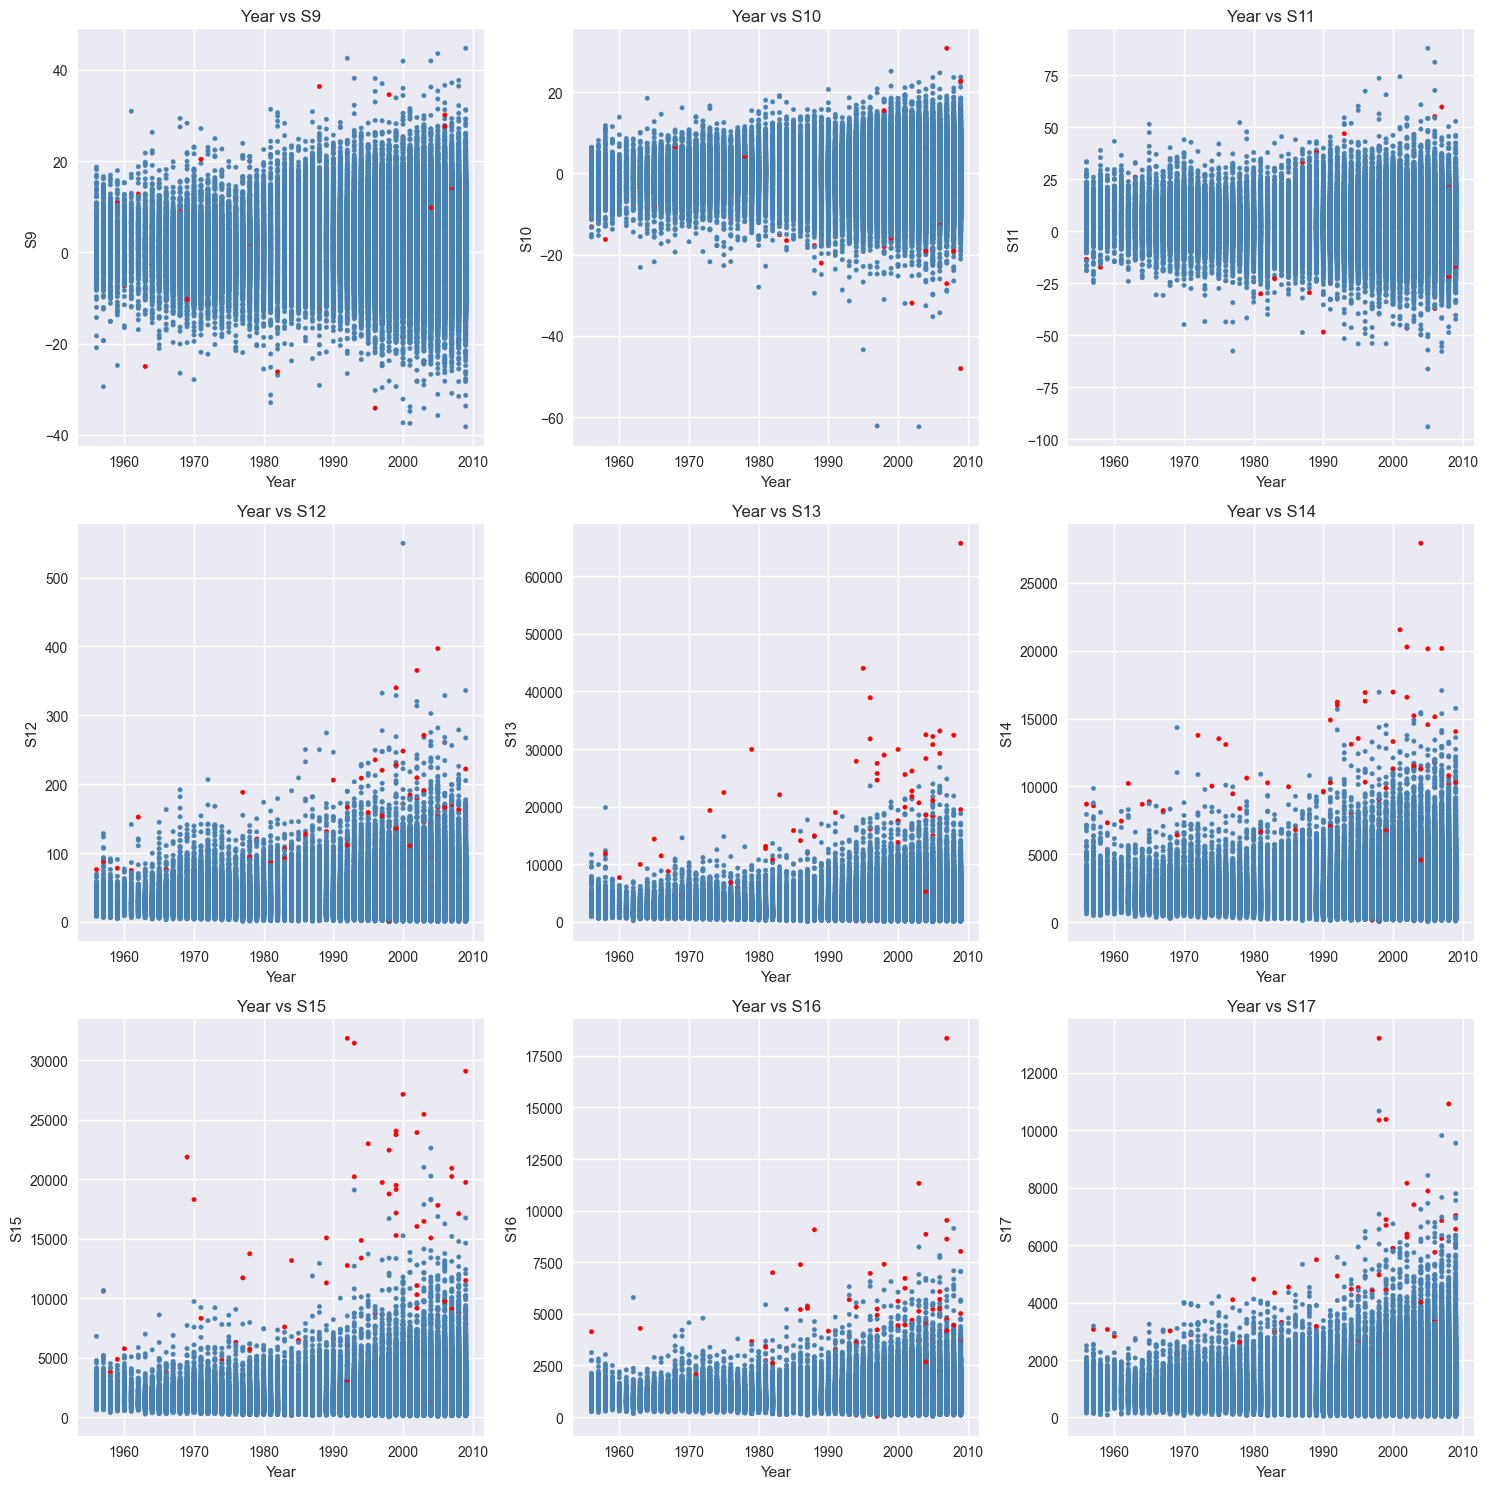

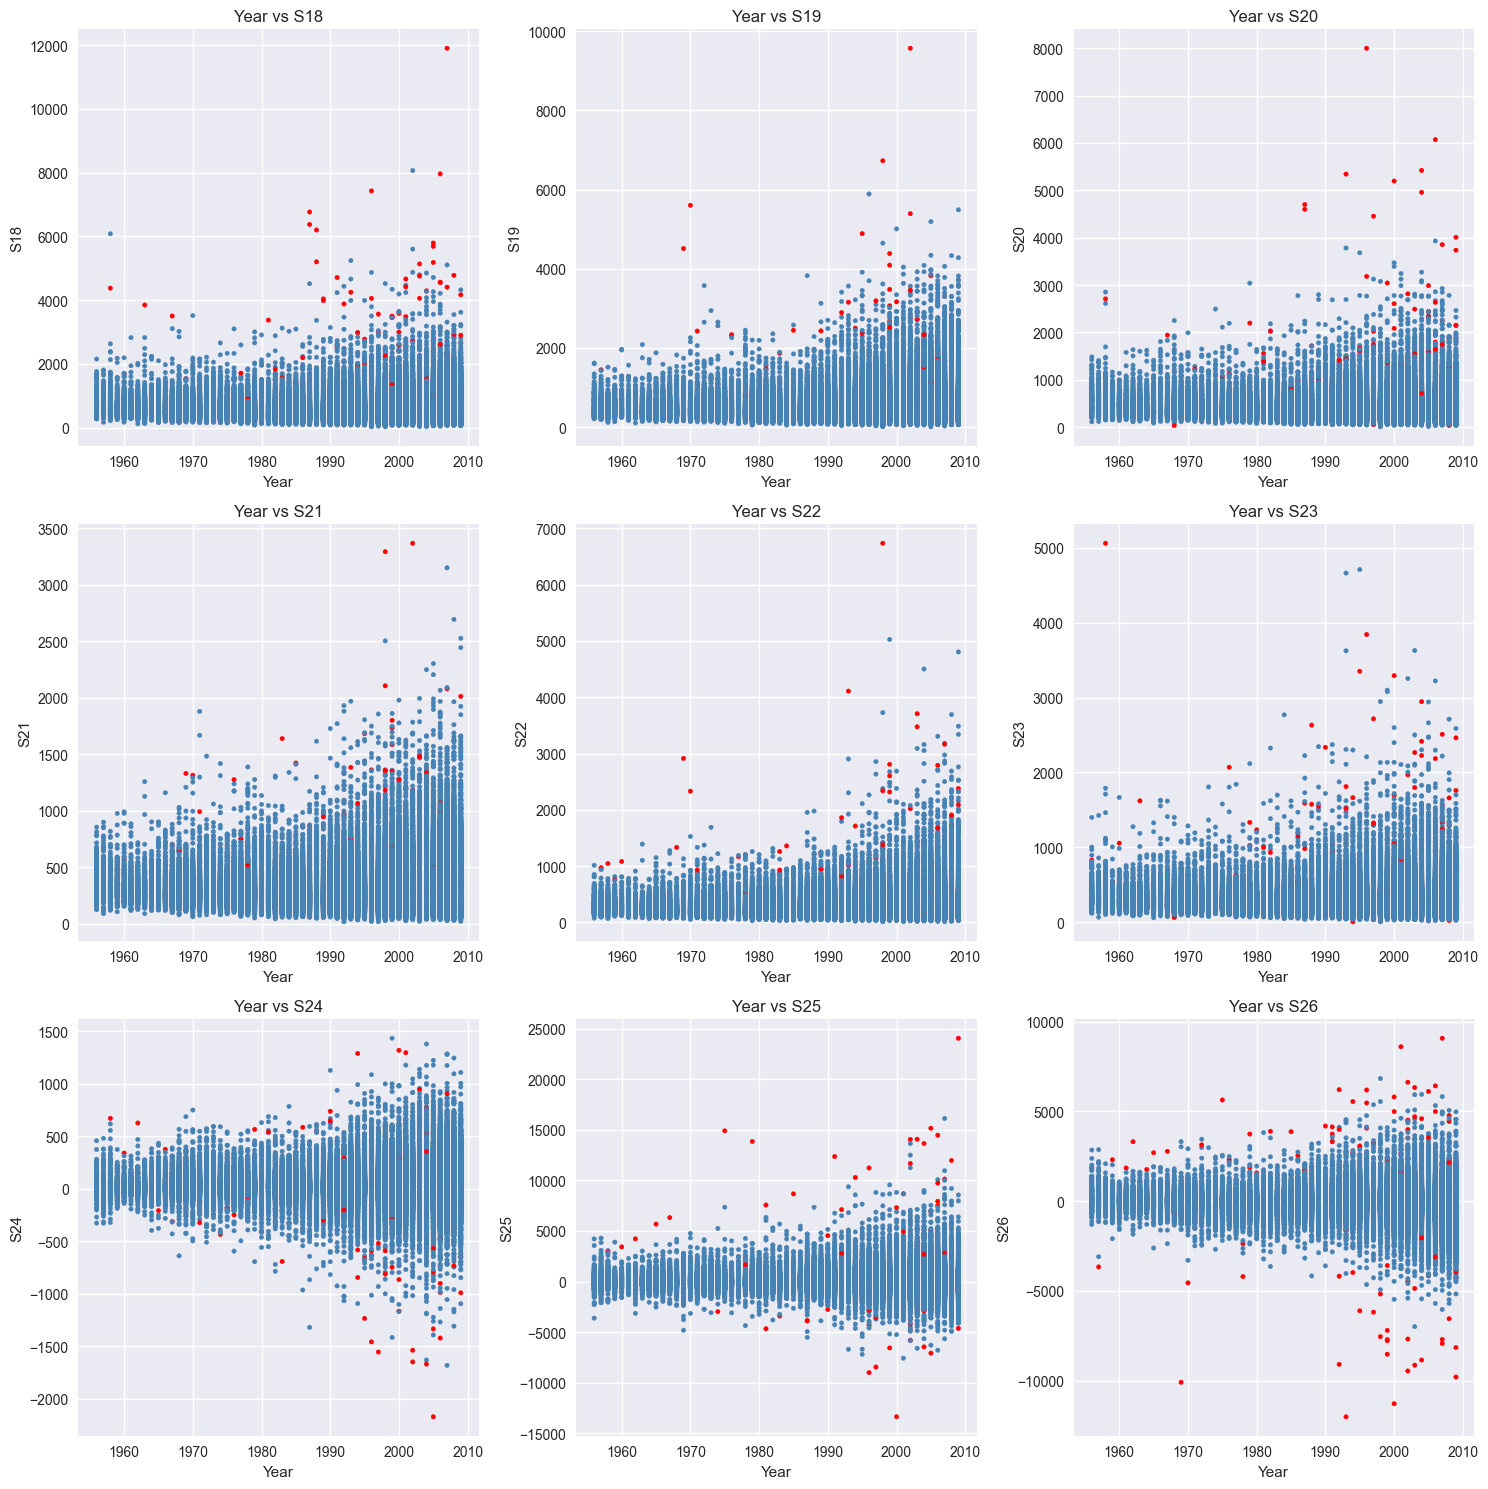

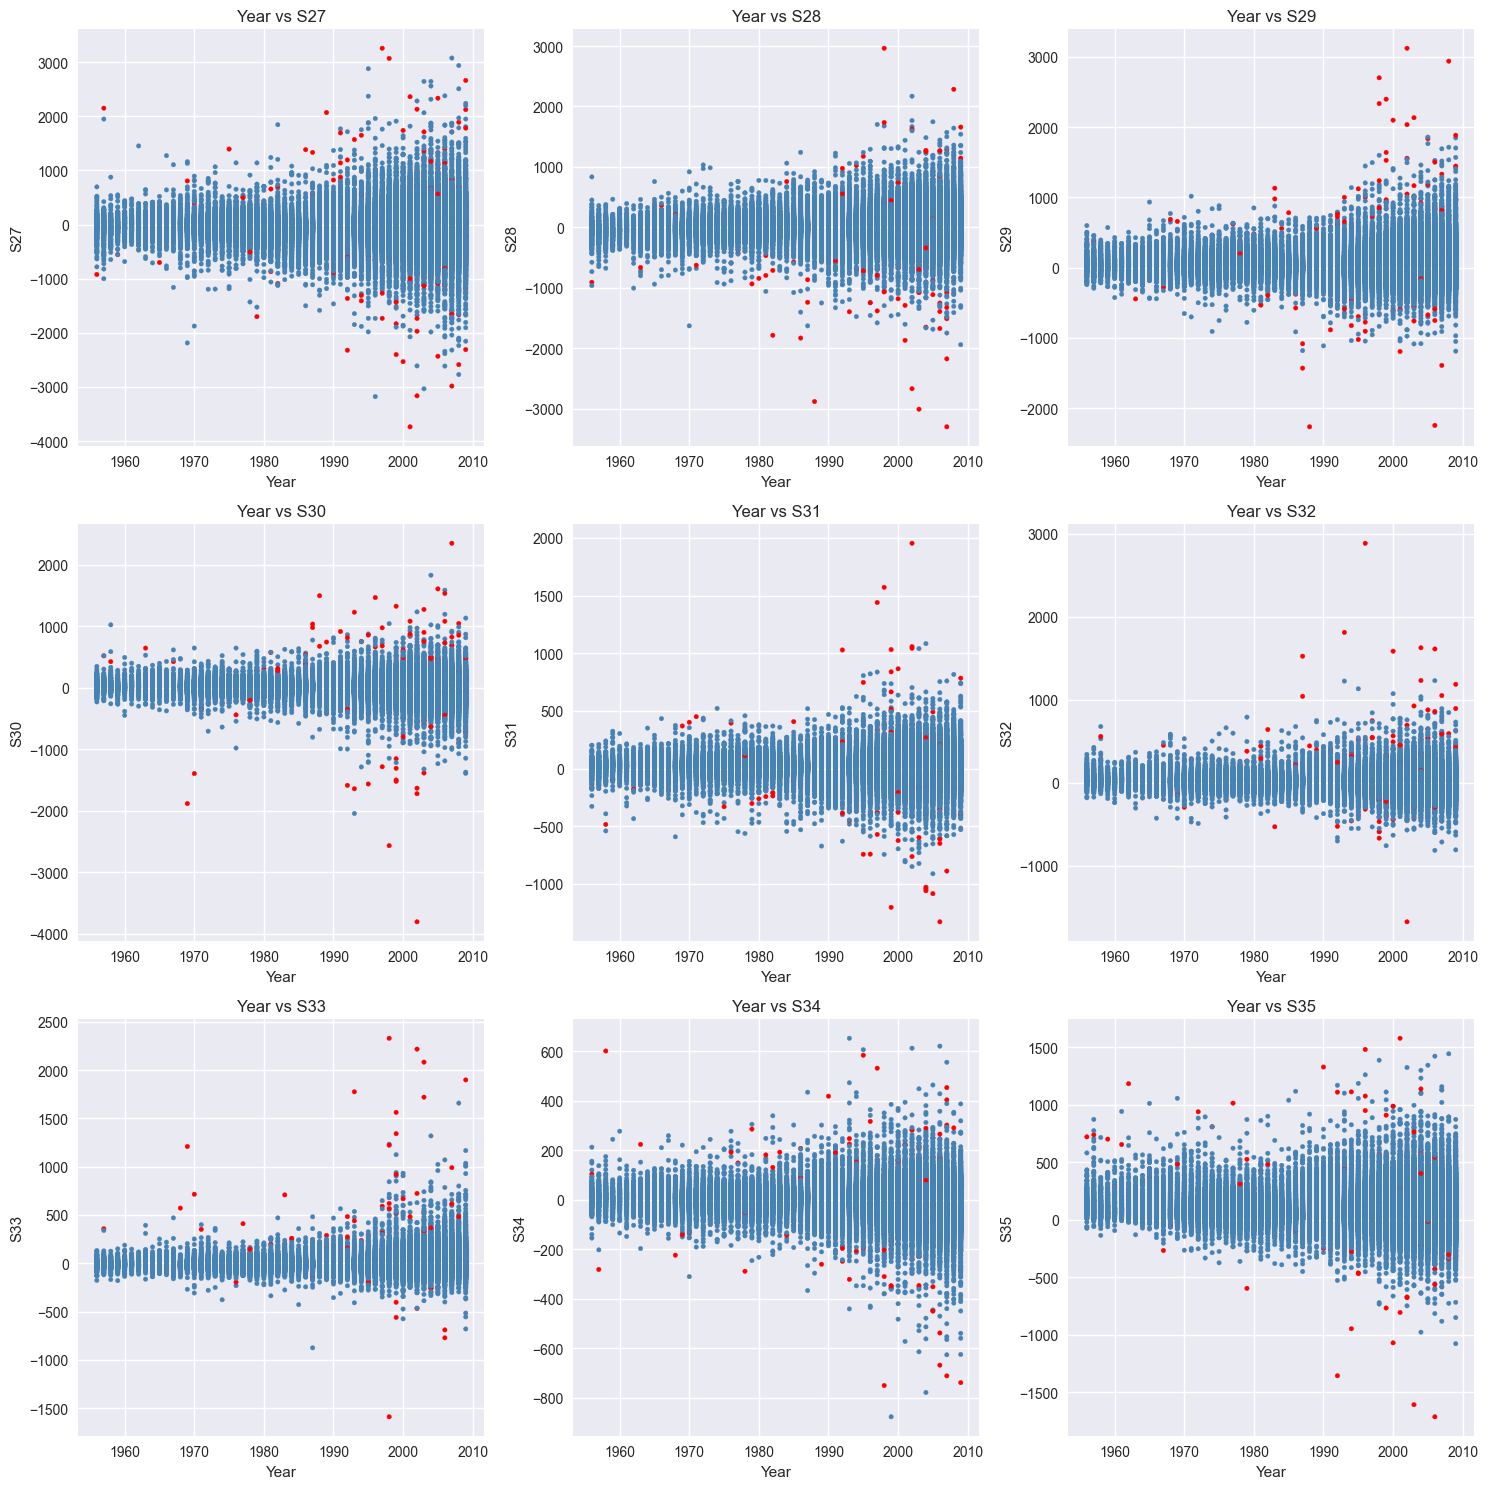

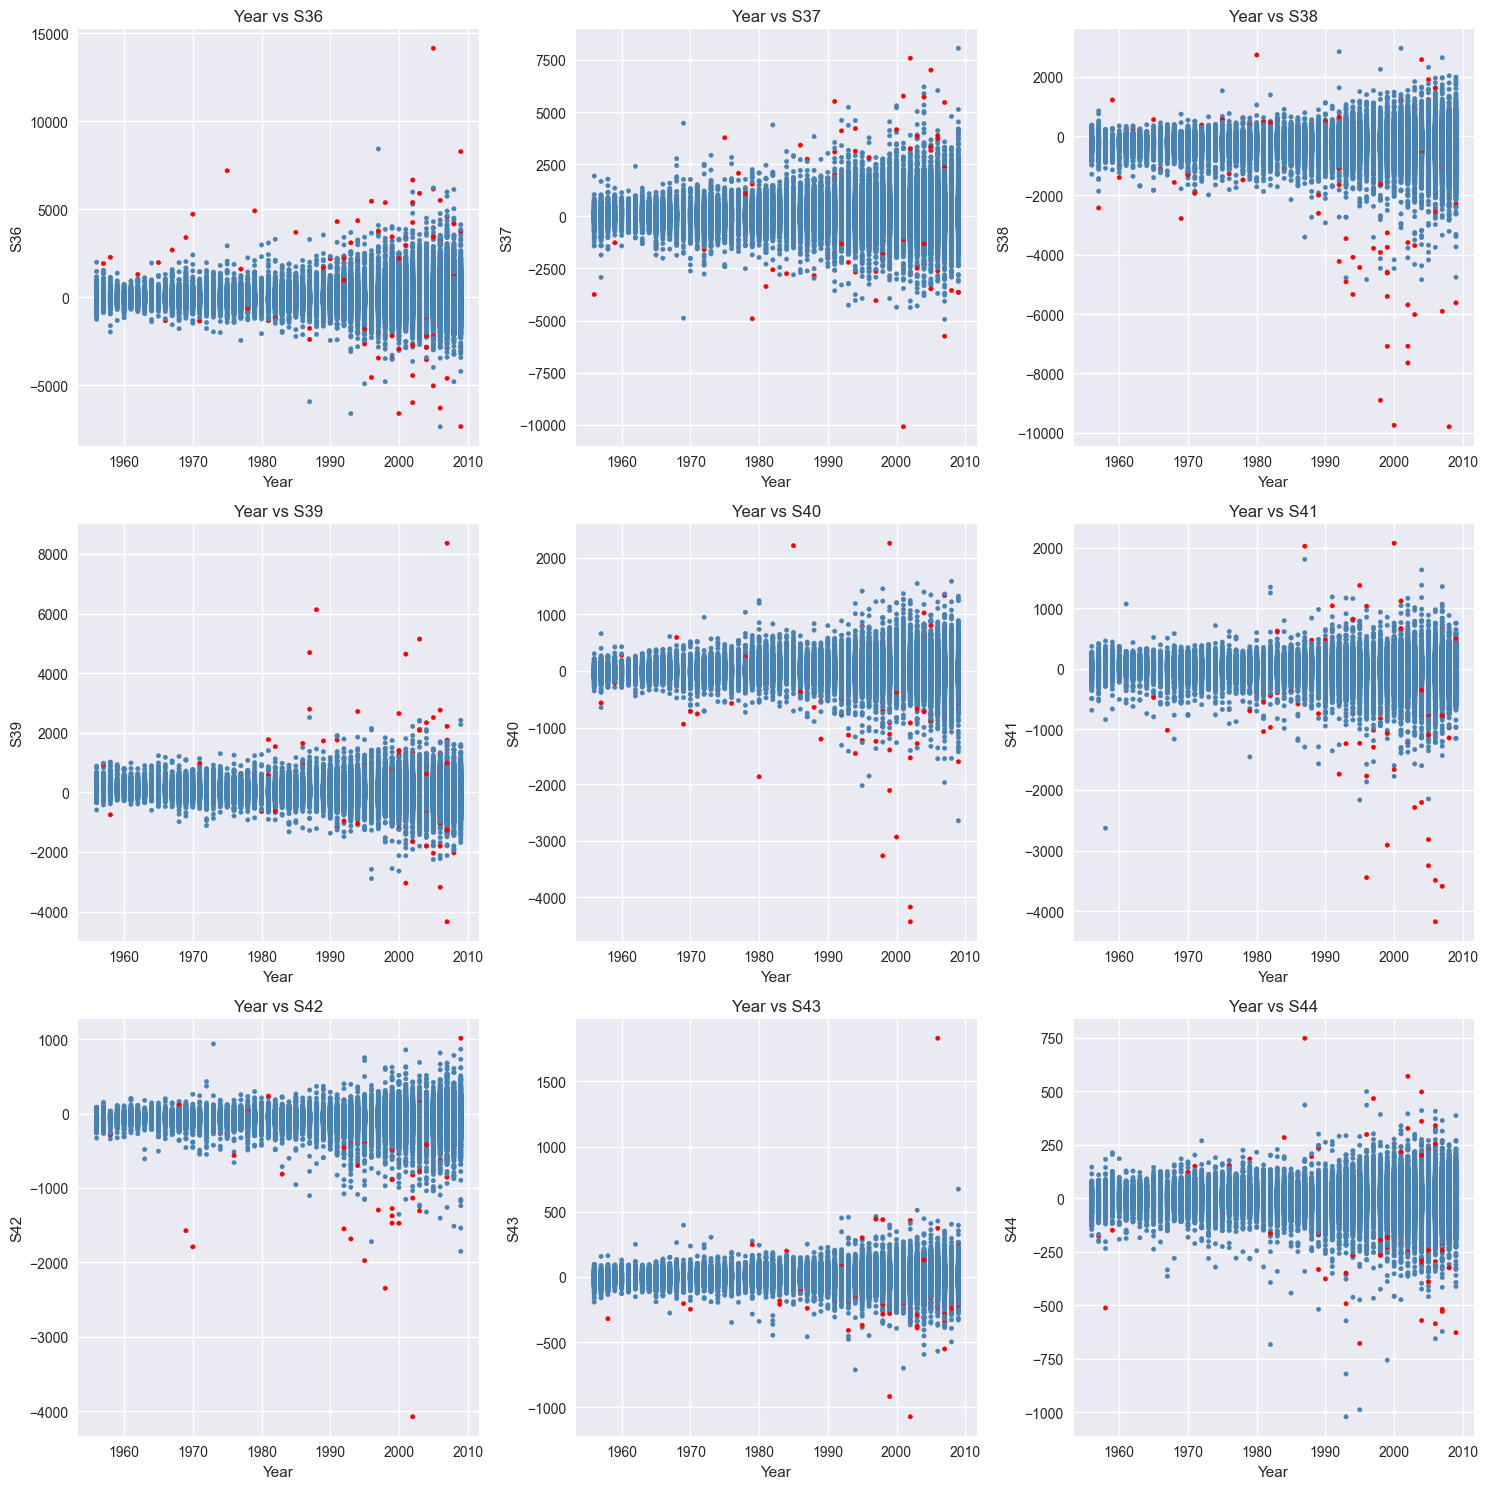

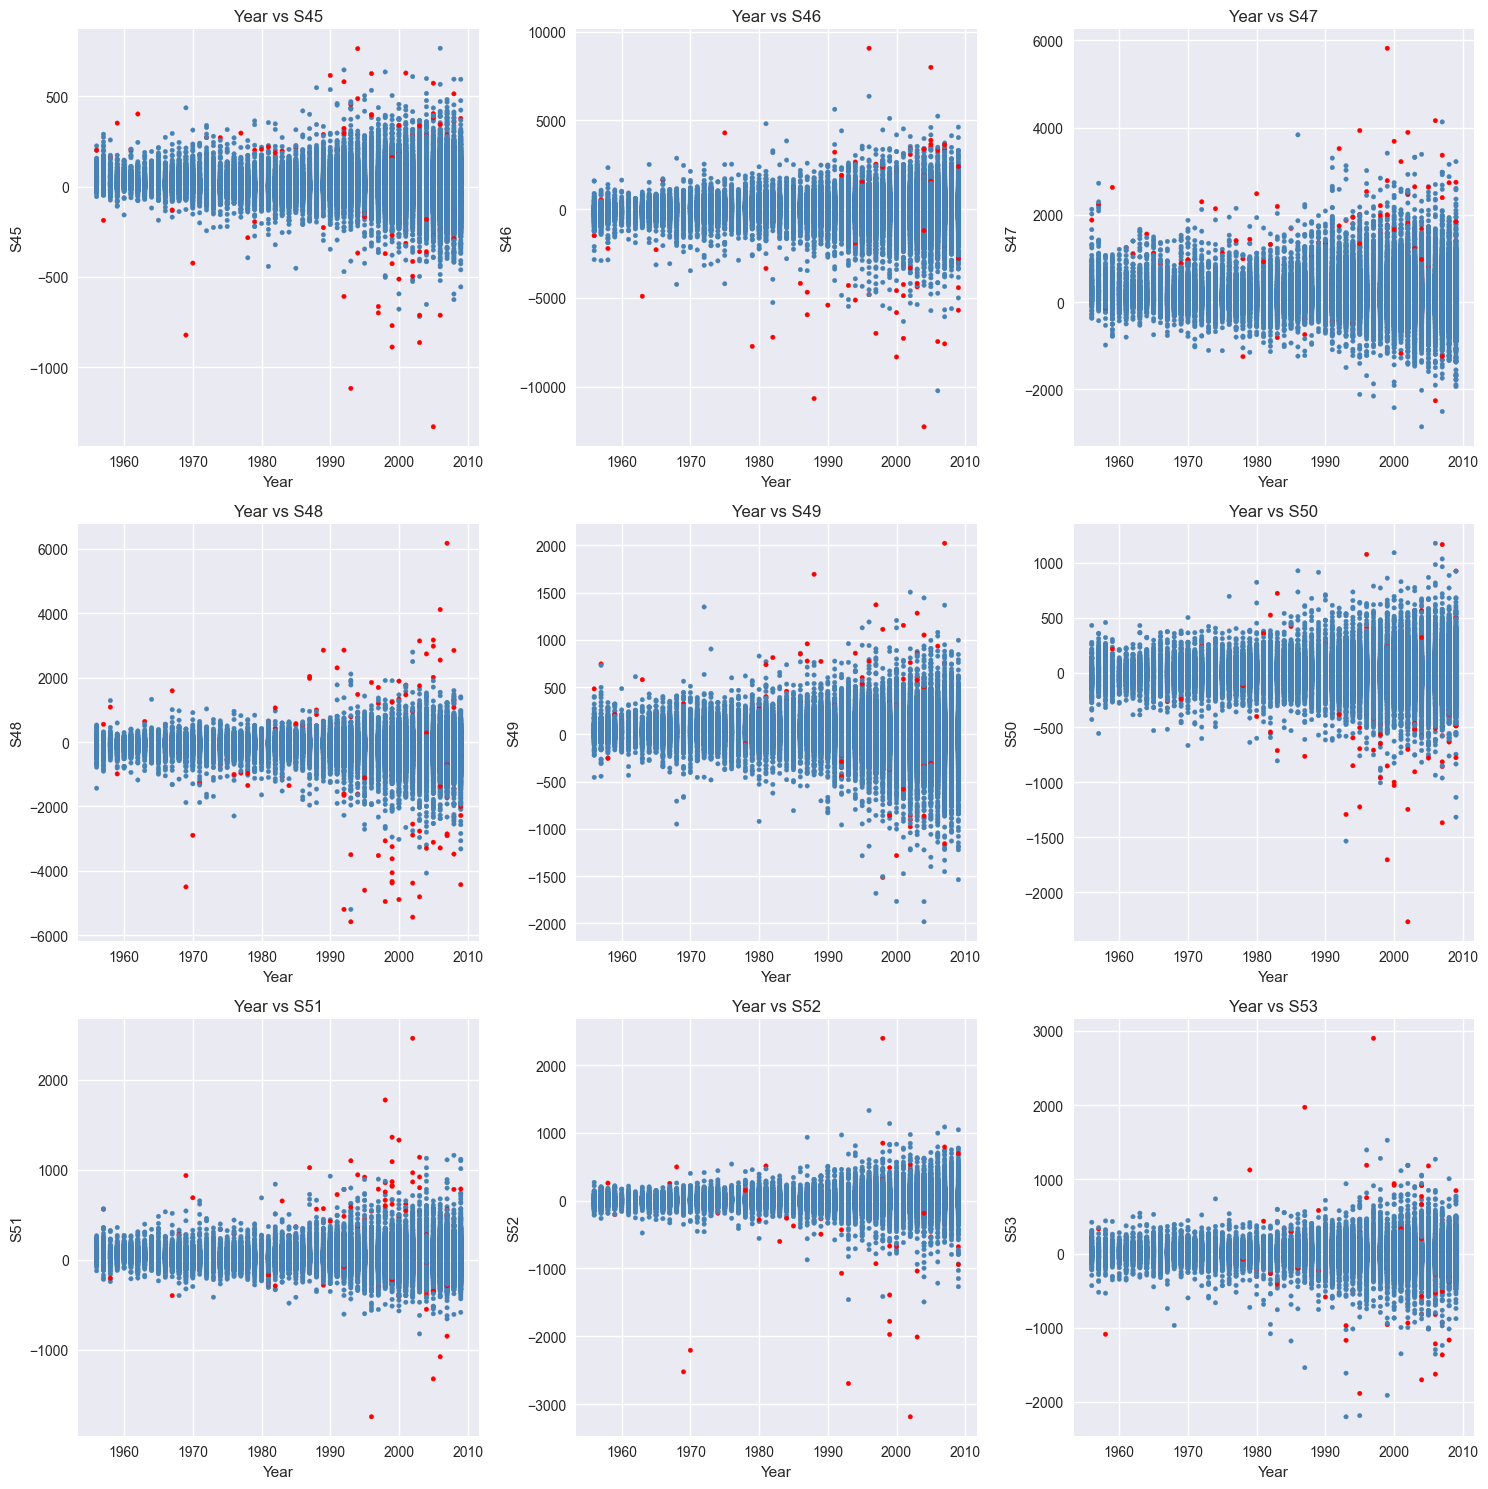

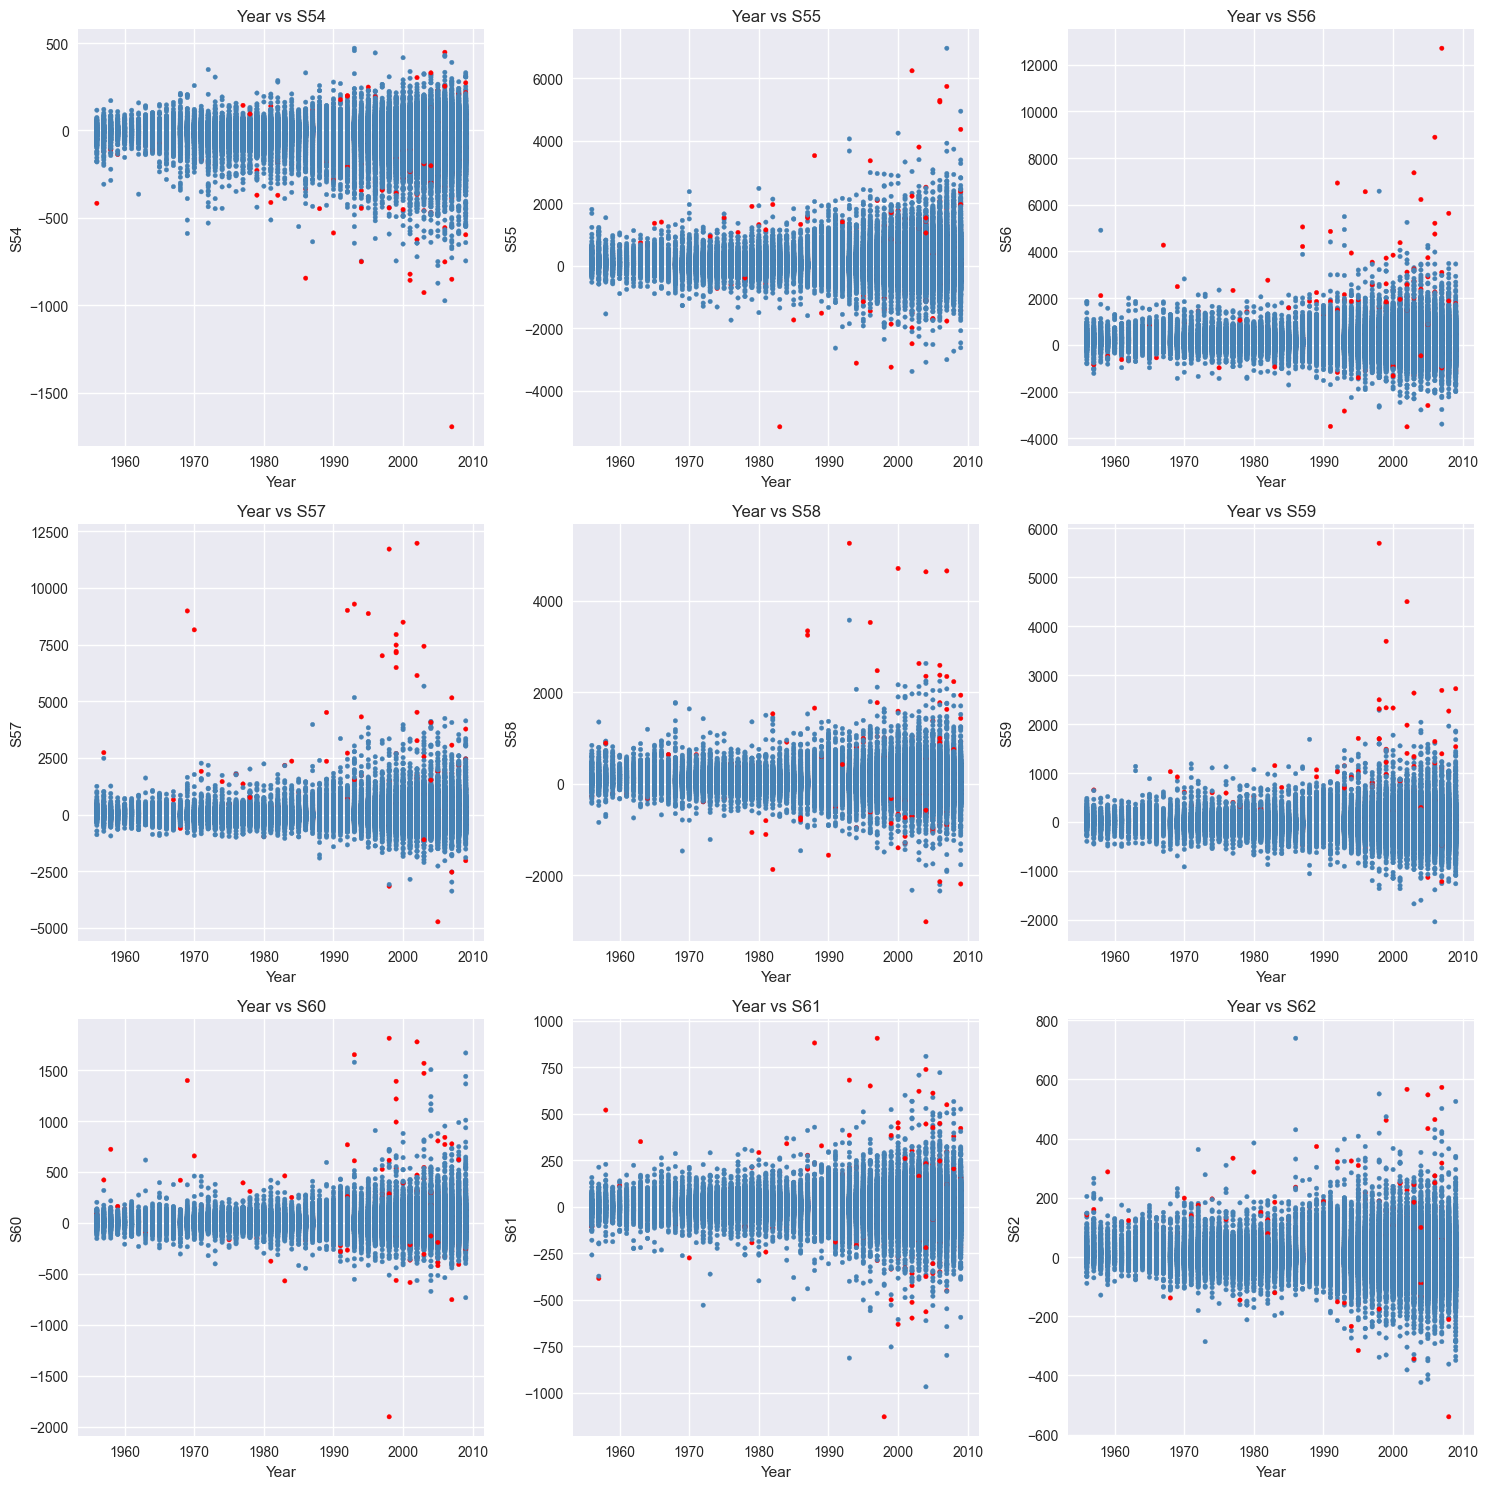

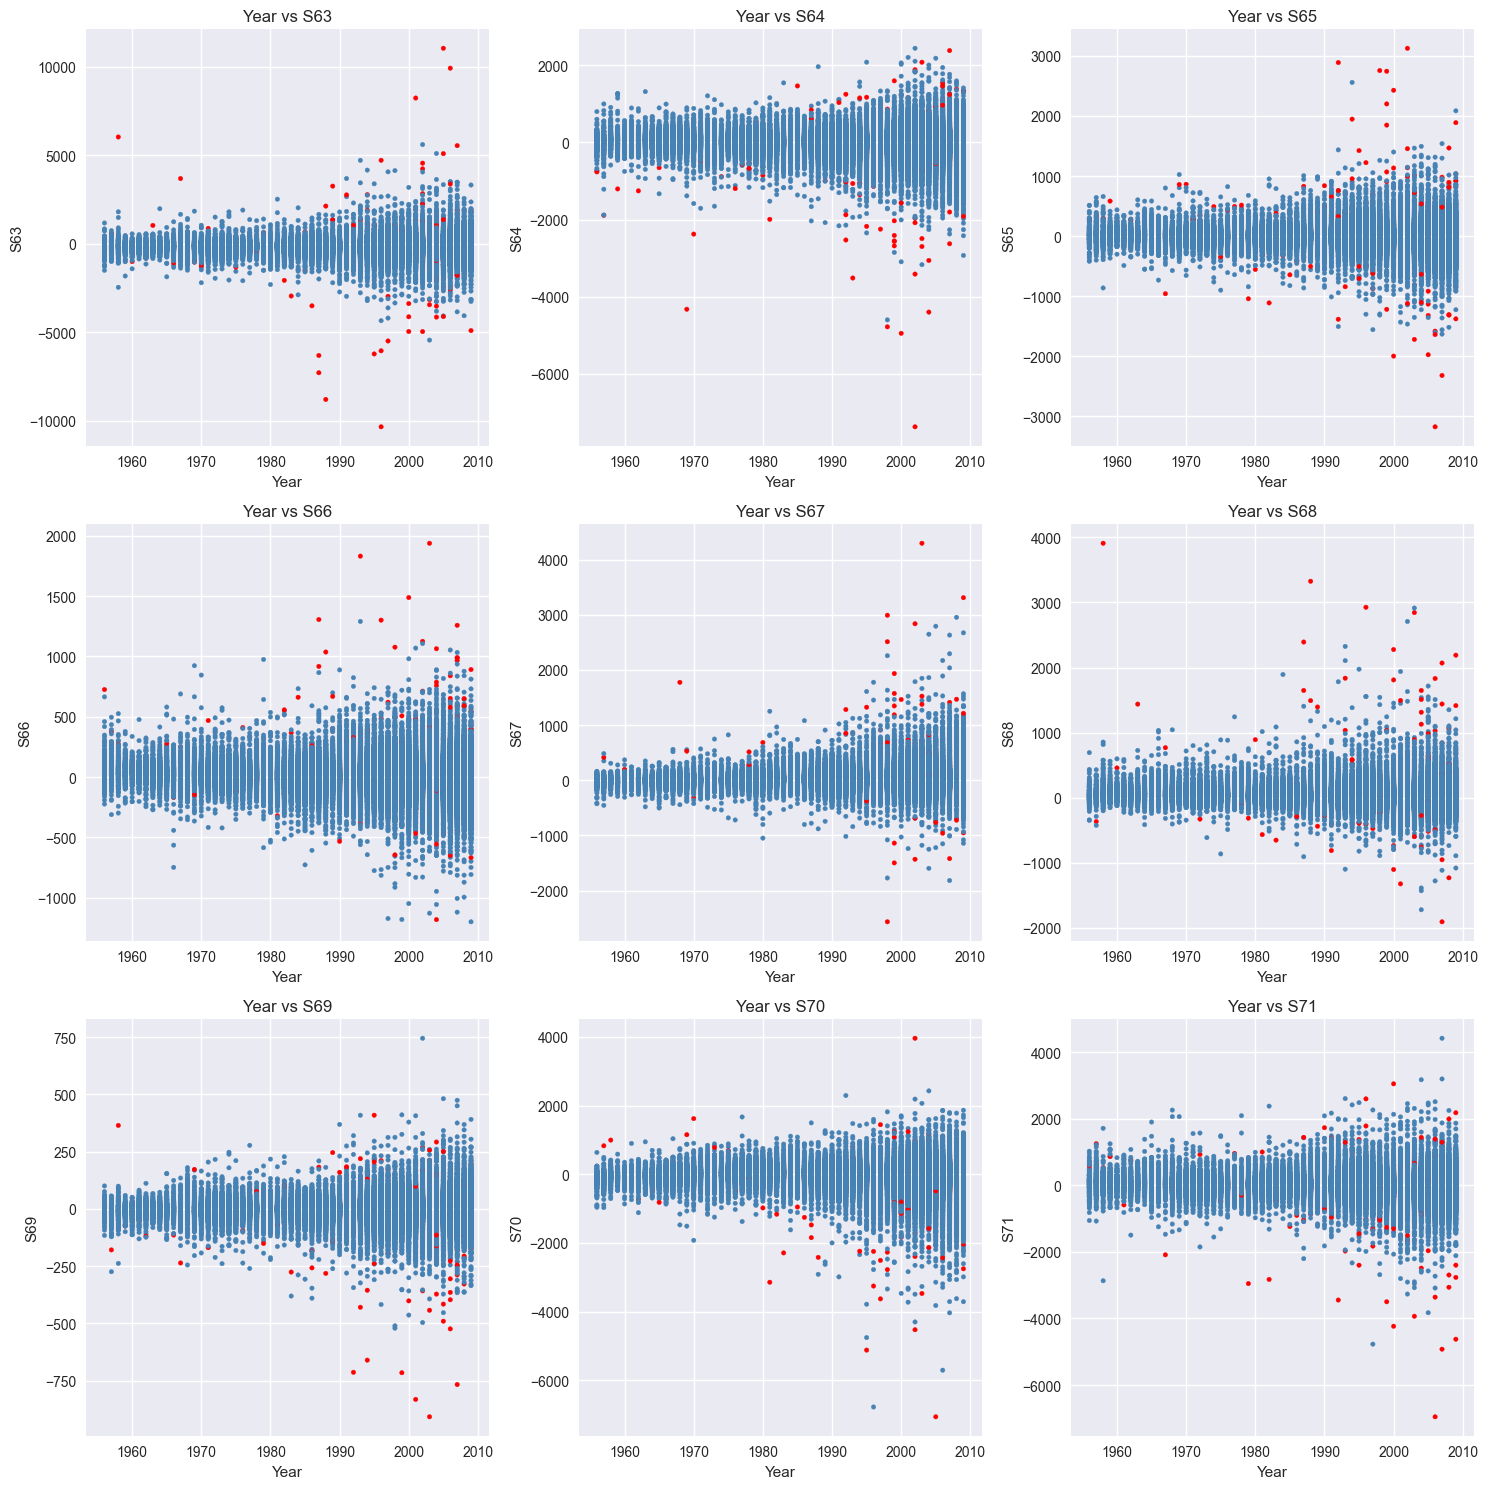

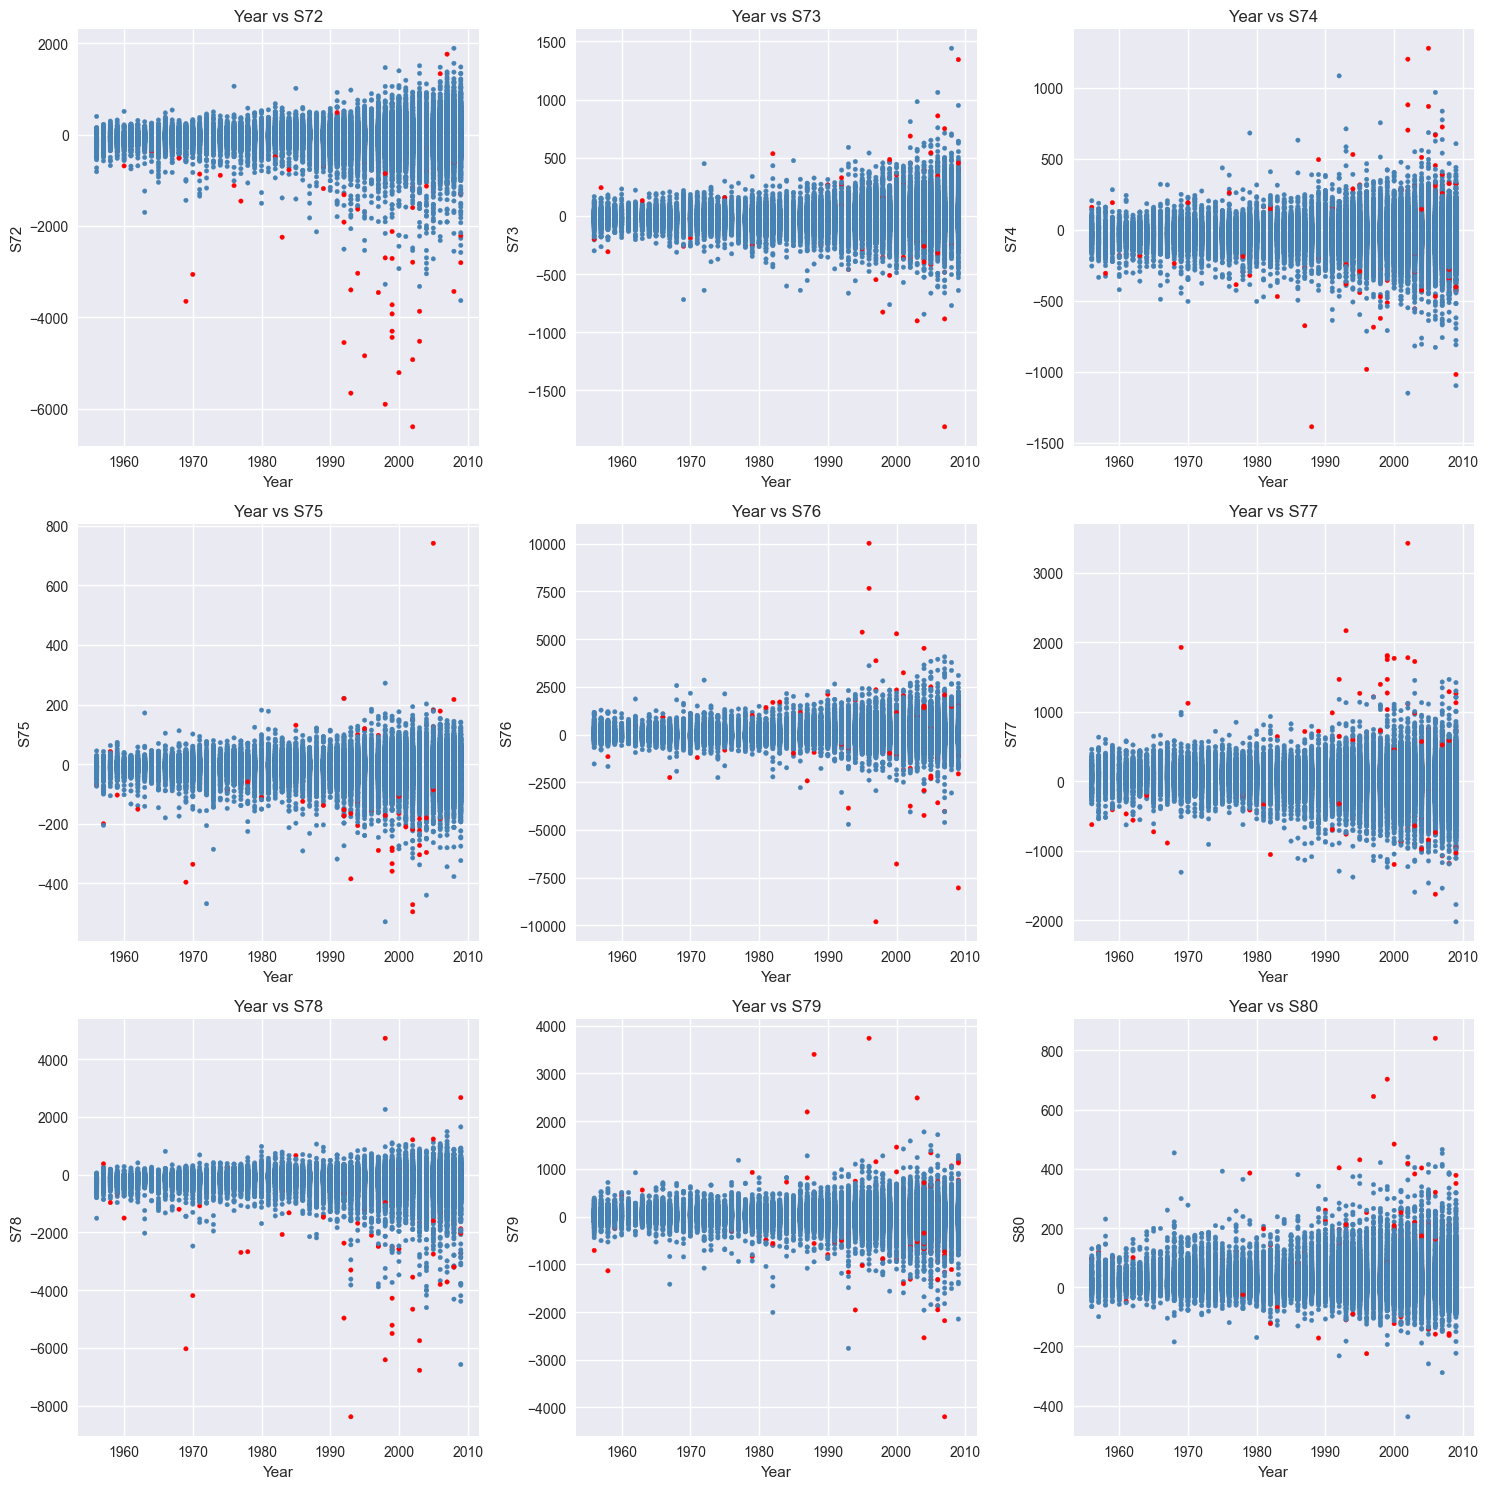

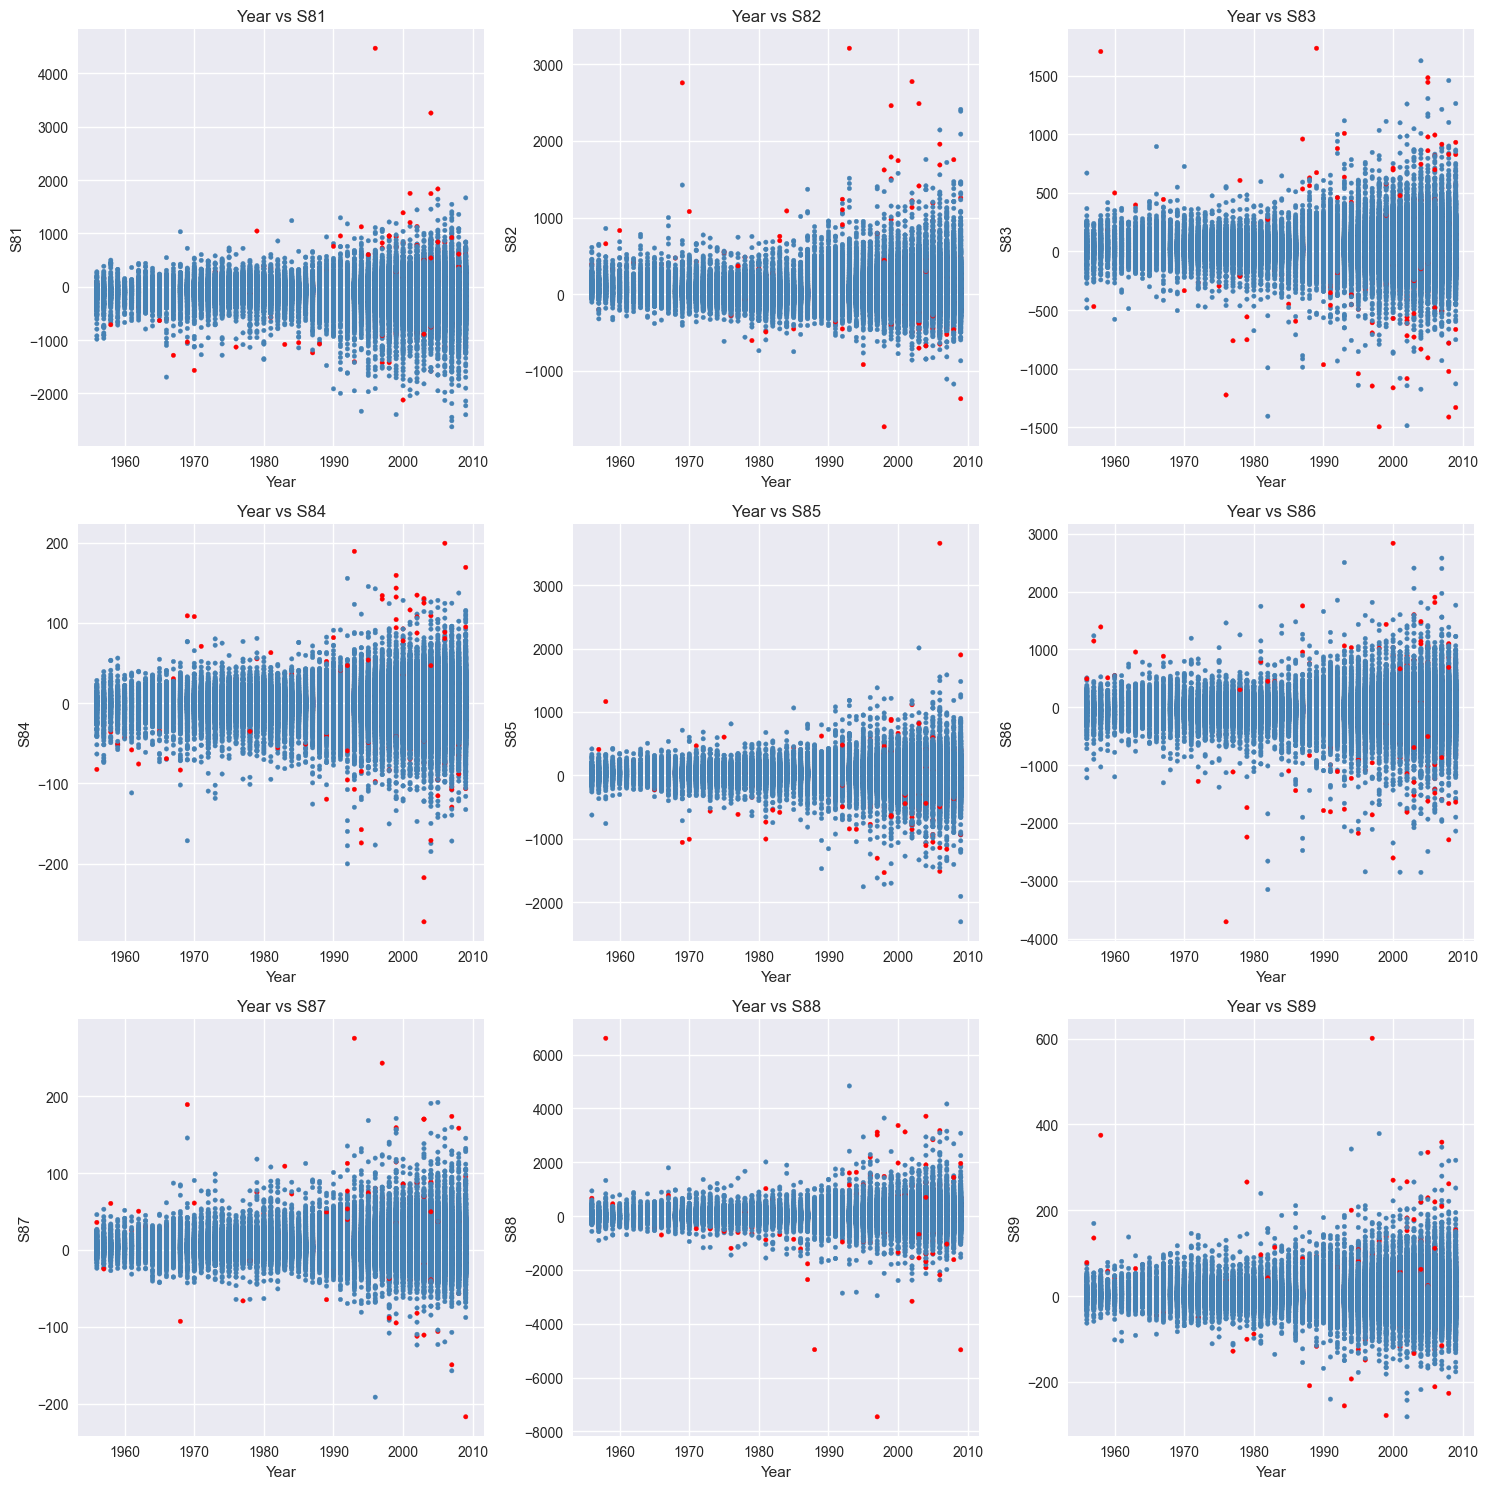

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

plt.style.use("seaborn-v0_8")

random_state = 42

df = pd.read_csv("train.csv")
train, _ = train_test_split(df, stratify=df["Year"], test_size=0.3, random_state=random_state)
columns = [col for col in train.columns if col != "Year"]
outliers = pd.Series(index=train.index, dtype=bool)

for year in train["Year"].unique():
    subset = train[train["Year"] == year]
    clf = LocalOutlierFactor(n_neighbors=25, contamination=0.001, n_jobs=-1)
    # clf = IsolationForest(
    #     max_samples=1.0,
    #     contamination=0.001,
    #     n_jobs=-1,
    #     random_state=random_state,
    # )
    outliers[subset.index] = clf.fit_predict(subset[columns]) == -1

print(outliers.sum())

max_subplots = 9

for i in range(0, len(columns), max_subplots):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for j, col in enumerate(columns[i : i + max_subplots]):
        colors = np.where(outliers, "red", "steelblue")
        axs[j].scatter(train["Year"], train[col], c=colors, s=10)
        axs[j].set_xlabel("Year")
        axs[j].set_ylabel(col)
        axs[j].set_title(f"Year vs {col}")

    for k in range(j + 1, max_subplots):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()